# Im folgenden werde ich die Csv Datei hochladen

In [6]:
import pandas as pd
df = pd.read_csv("train_values.csv")

In [7]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


# Auf leere Werte überprüfen

In [8]:
df.shape

(260601, 39)

In [9]:
df.isnull()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
260597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
260598,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
260599,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Die Nullen bedeutet, dass wir in keiner column fehlende Werte haben

# Jetzt werde ich auf Duplikate überprüfen und löschen

In [11]:
df1 = df.drop_duplicates()

In [12]:
df1.shape

(260601, 39)

Wir sehen, wenn wir df1.shape und df.shape vergleichen, dass beide die gleiche anzahl an columns and rows haben und deswegen keine Duplikate vorhanden waren

# Im Boxplot angucken ob wir viele outliner haben 

In [13]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

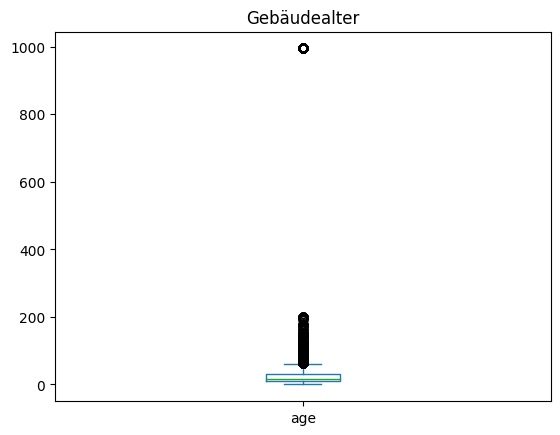

In [14]:
df["age"].plot(kind = "box", title = "Gebäudealter")
plt.show

wir sehen, dass die meisten Gebäude unter 100 Jahre alt sind, es gibt einige die Leicht über 200 Jahre alt sind und ein outliner, der 100 Jahre alt ist

<function matplotlib.pyplot.show(close=None, block=None)>

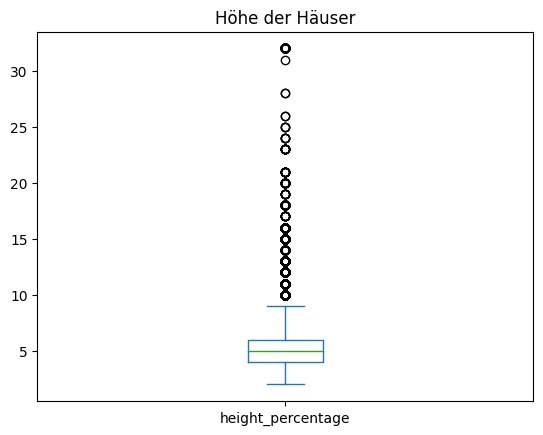

In [15]:
df["height_percentage"].plot(kind = "box", title = "Höhe der Häuser")
plt.show

Meiner Meinung nach sieht dass schonmal schöner aus

# Ausreißer identifizieren

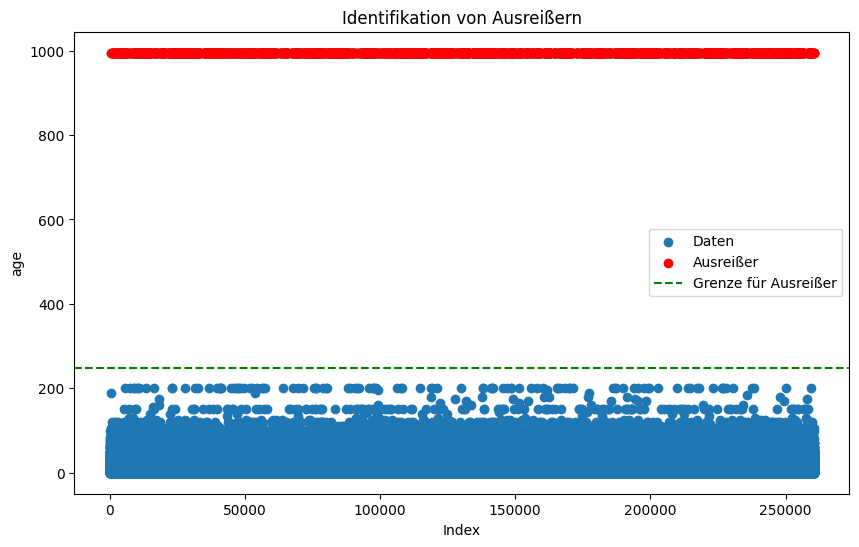

In [16]:
# Berechnung von Durchschnitt und Standardabweichung
mean_value = df['age'].mean()
std_dev = df['age'].std()

# Festlegen einer Grenze für Ausreißer (z.B., 3-fache Standardabweichung)
outlier_limit = mean_value + 3 * std_dev

# Identifizieren von Ausreißern
outliers = df[df['age'] > outlier_limit]

# Visualisierung der Daten mit Ausreißern
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['age'], label='Daten')
plt.scatter(outliers.index, outliers['age'], color='r', label='Ausreißer')
plt.axhline(y=outlier_limit, color='g', linestyle='--', label='Grenze für Ausreißer')
plt.legend()
plt.title('Identifikation von Ausreißern')
plt.xlabel('Index')
plt.ylabel('age')
plt.show()

In [37]:
schwellenwert = 950

# Bedingte Indexierung
ausgewaehlte_zeilen = df[df['age'] > schwellenwert]

# Ausgabe der ausgewählten Zeilen
print(ausgewaehlte_zeilen)

        building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
386          435557              14            1120            3789   
716          597626              26              39            1851   
1235           7560              26            1132            9472   
1398         797271              26              39            1851   
1635         857371              24             628           10750   
...             ...             ...             ...             ...   
259758       160373              27             390           11020   
259893         9269              24             628           11511   
260093        34321              17            1393            5939   
260542       156434               8             696            7863   
260579       977263               8             696            4415   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
386                       3  995               12                  5   
716

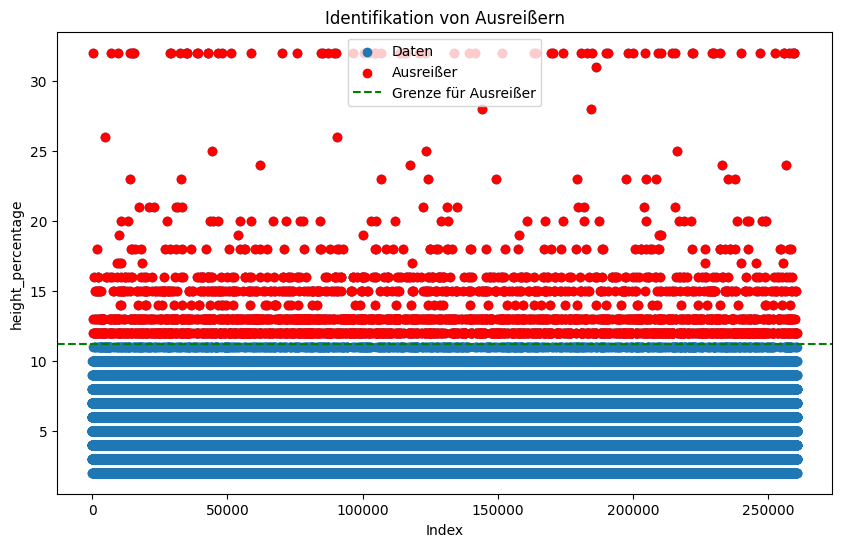

In [17]:
# Berechnung von Durchschnitt und Standardabweichung
mean_value = df['height_percentage'].mean()
std_dev = df['height_percentage'].std()

# Festlegen einer Grenze für Ausreißer (z.B., 3-fache Standardabweichung)
outlier_limit = mean_value + 3 * std_dev

# Identifizieren von Ausreißern
outliers = df[df['height_percentage'] > outlier_limit]

# Visualisierung der Daten mit Ausreißern
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['height_percentage'], label='Daten')
plt.scatter(outliers.index, outliers['height_percentage'], color='r', label='Ausreißer')
plt.axhline(y=outlier_limit, color='g', linestyle='--', label='Grenze für Ausreißer')
plt.legend()
plt.title('Identifikation von Ausreißern')
plt.xlabel('Index')
plt.ylabel('height_percentage')
plt.show()

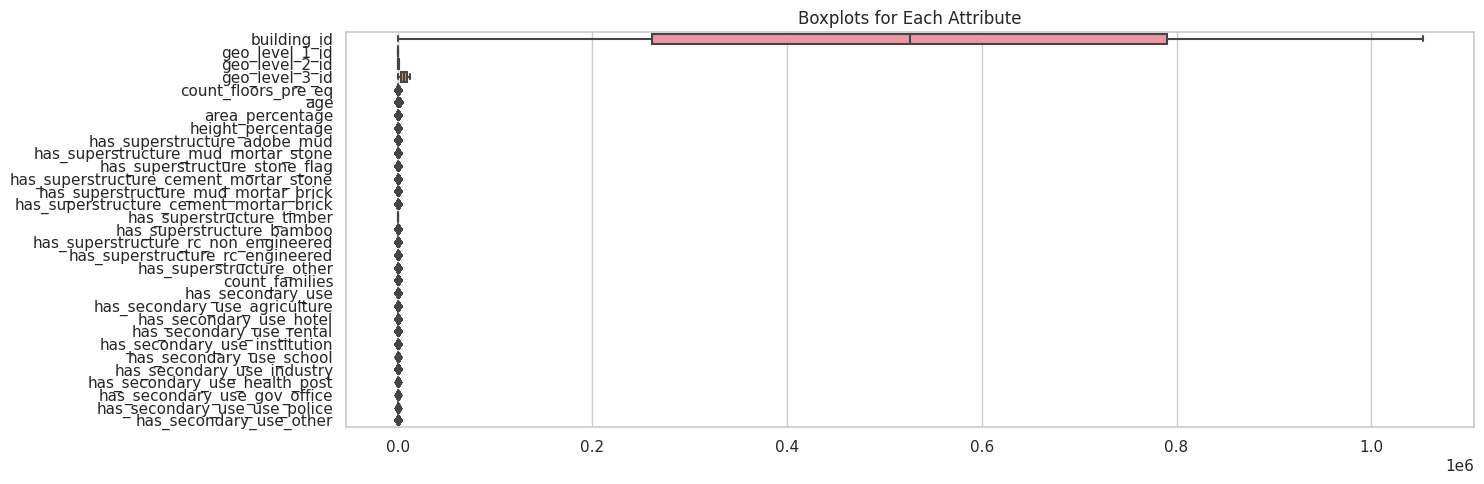

In [44]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def visualize_outliers(data):
    # Set the style for the plots
    sns.set(style="whitegrid")

    # Create a boxplot for each column
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=data, orient="h")

    # Add title
    plt.title('Boxplots for Each Attribute')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Beispielaufruf mit Ihrem DataFrame 'df'
visualize_outliers(df)



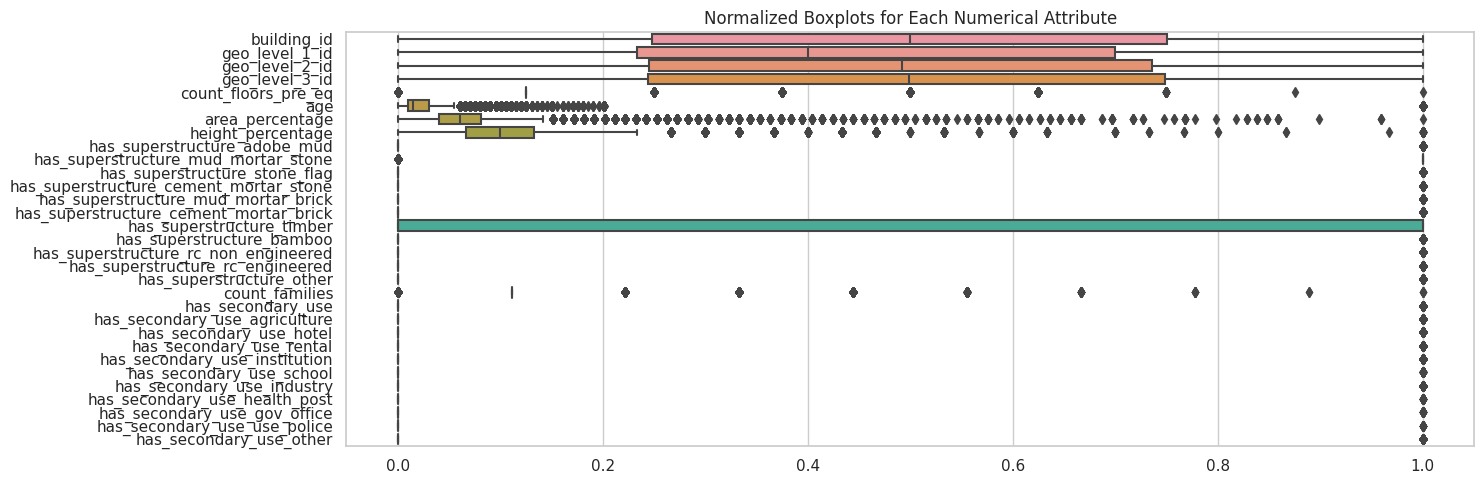

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Numerische Attribute auswählen
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Daten normalisieren
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Set the style for the plots
sns.set(style="whitegrid")

# Create a boxplot for each normalized column
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_normalized, orient="h")

# Add title
plt.title('Normalized Boxplots for Each Numerical Attribute')

# Adjust layout
plt.tight_layout()
plt.show()


### deskrepive Methoden

In [22]:
print(df.describe())


        building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
count  2.606010e+05   260601.000000   260601.000000   260601.000000   
mean   5.256755e+05       13.900353      701.074685     6257.876148   
std    3.045450e+05        8.033617      412.710734     3646.369645   
min    4.000000e+00        0.000000        0.000000        0.000000   
25%    2.611900e+05        7.000000      350.000000     3073.000000   
50%    5.257570e+05       12.000000      702.000000     6270.000000   
75%    7.897620e+05       21.000000     1050.000000     9412.000000   
max    1.052934e+06       30.000000     1427.000000    12567.000000   

       count_floors_pre_eq            age  area_percentage  height_percentage  \
count        260601.000000  260601.000000    260601.000000      260601.000000   
mean              2.129723      26.535029         8.018051           5.434365   
std               0.727665      73.565937         4.392231           1.918418   
min               1.000000       0.0

Als nächstes ein Histogramm

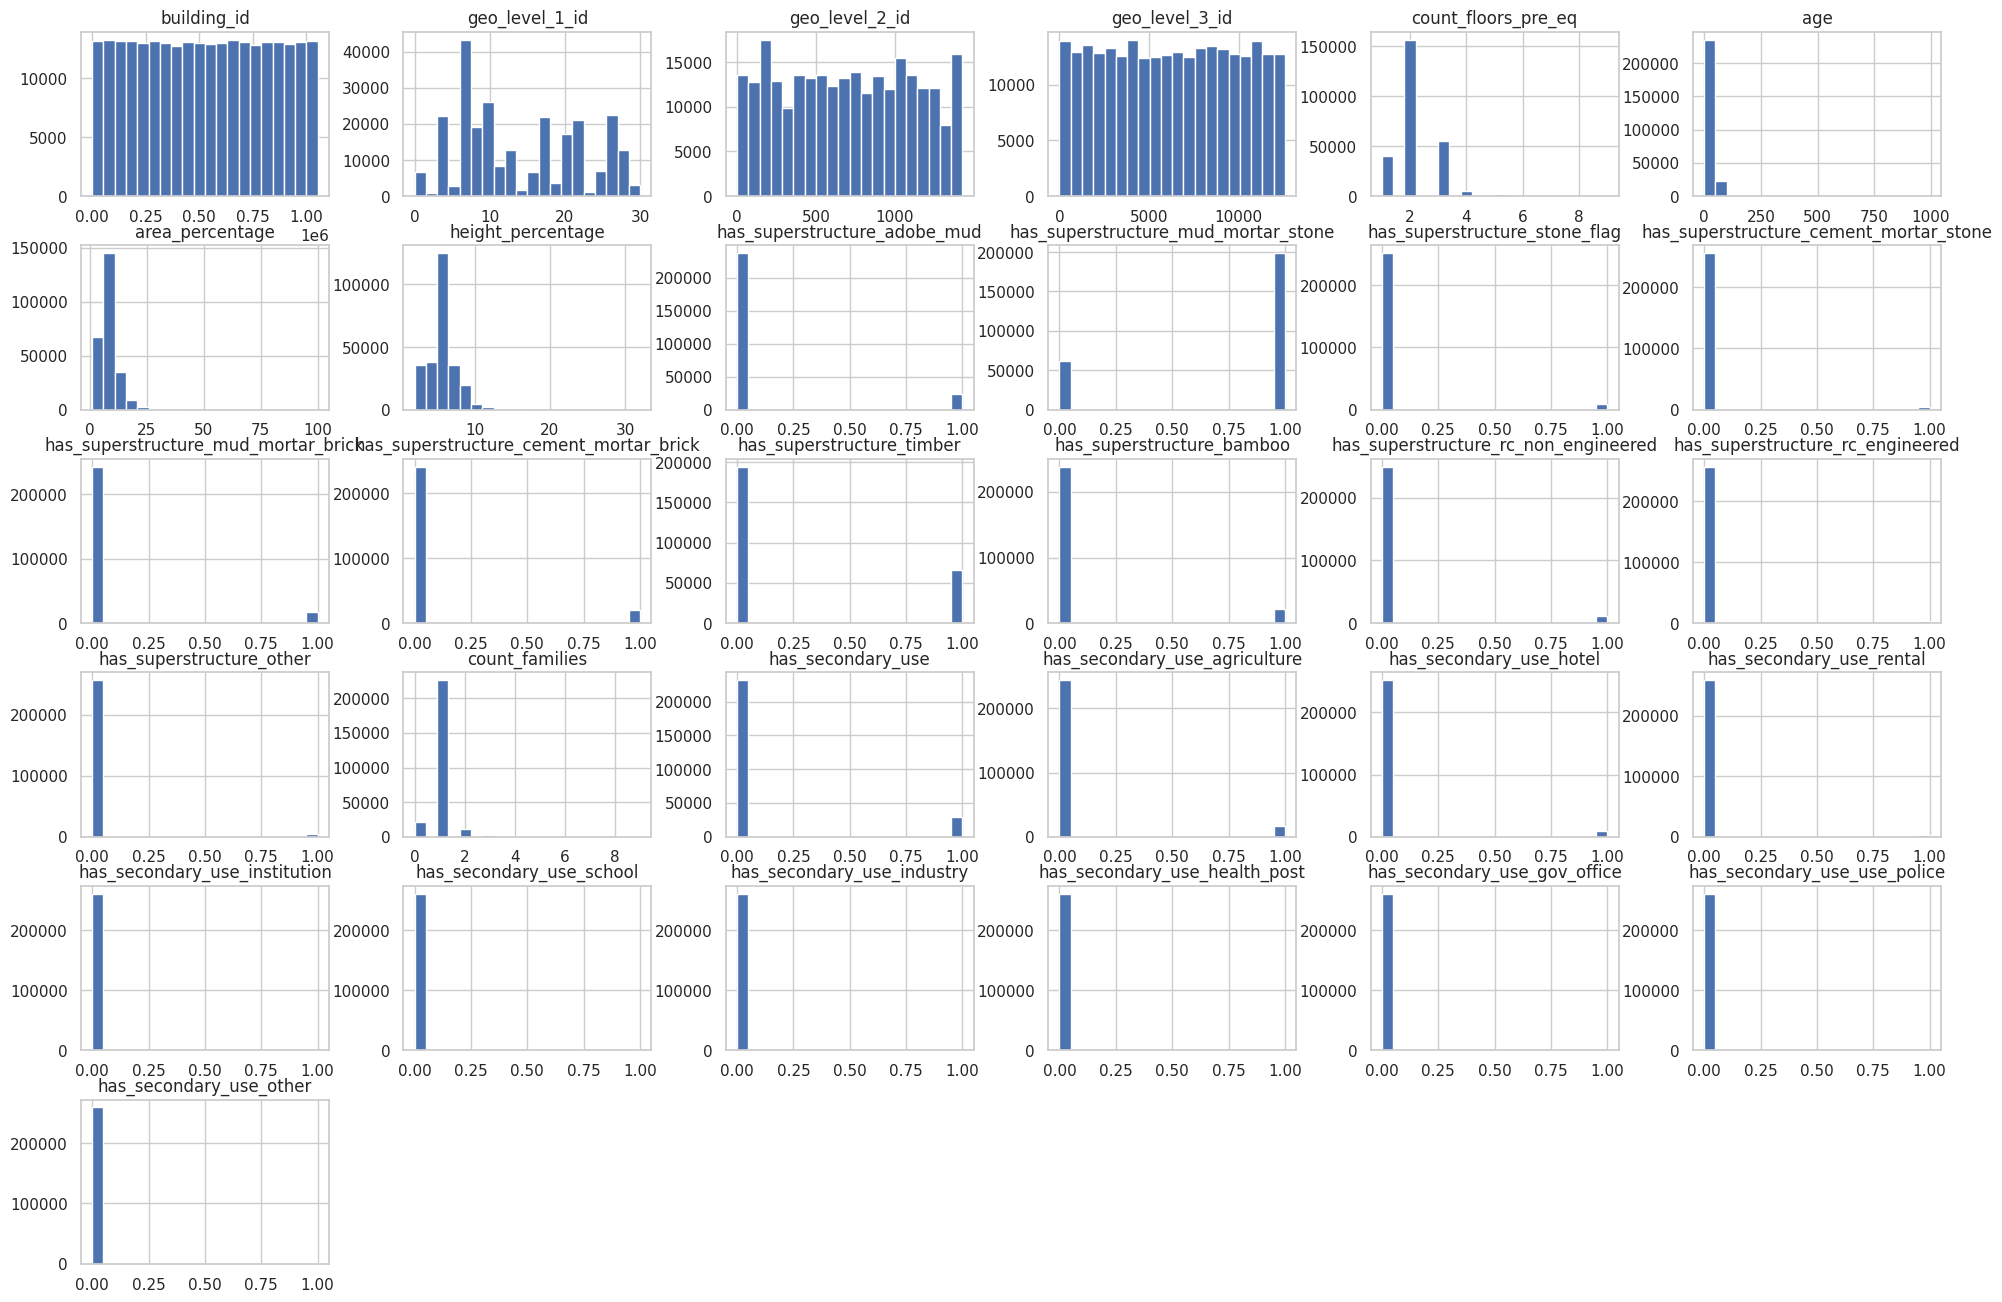

In [35]:
df.hist(figsize=(24, 16), bins=20)
plt.show()


Korrelationsmatrix

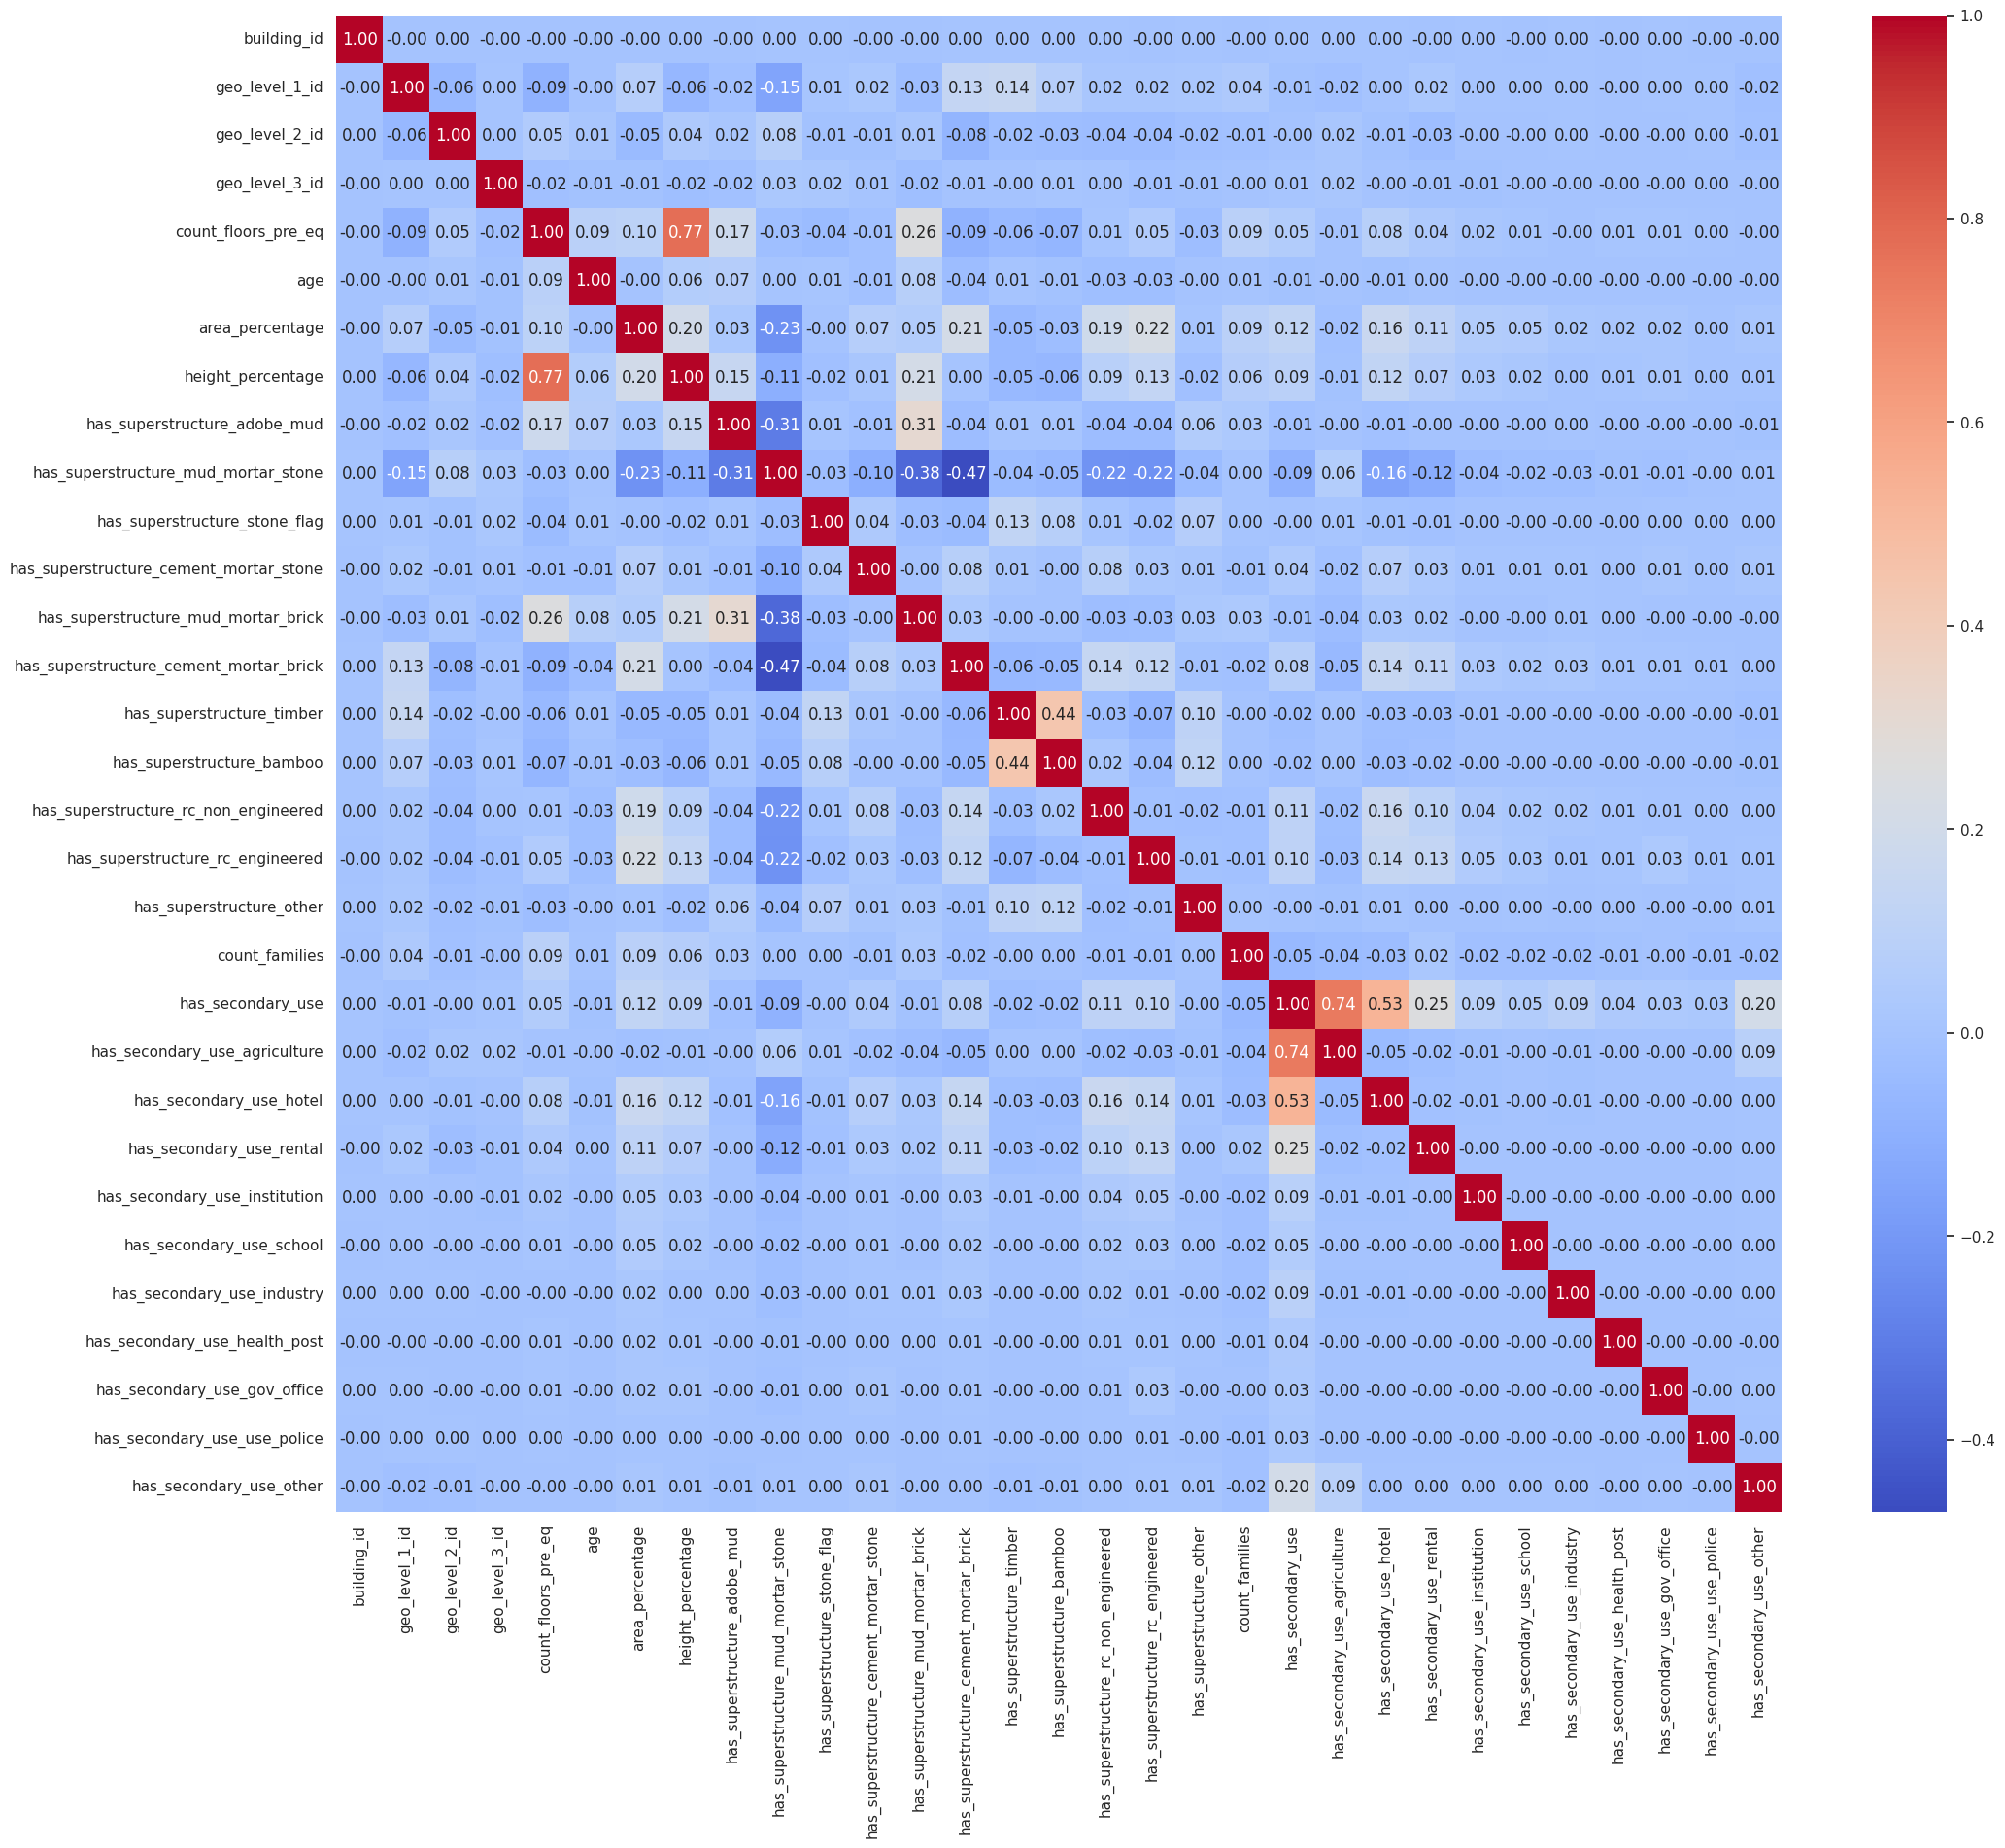

In [45]:
# Nur numerische Spalten auswählen
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Reihenfolge der Attribute ändern
columns_order = correlation_matrix.columns
correlation_matrix = correlation_matrix.reindex(columns=columns_order)

# Heatmap erstellen
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()



In [32]:
def unique_values_per_attribute(data):
    unique_values_dict = {}
    for column in data.columns:
        unique_values_dict[column] = data[column].unique()
    return unique_values_dict

# Beispielaufruf mit Ihrem DataFrame 'df'
unique_values = unique_values_per_attribute(df)

# Ausgabe der einzigartigen Werte für jedes Attribut
for column, values in unique_values.items():
    print(f"{column}: {values}")


building_id: [802906  28830  94947 ... 602512 151409 747594]
geo_level_1_id: [ 6  8 21 22 11  9 20  0 26 17 12 18  4 27 25 10  7  3 13 30 16  5 15 14
 19  1 24 28 23  2 29]
geo_level_2_id: [487 900 363 ...  77 115 627]
geo_level_3_id: [12198  2812  8973 ...  3152  5276  3085]
count_floors_pre_eq: [2 3 1 4 5 6 7 8 9]
age: [ 30  10  25   0  15  20  45  55   5  40  80  60  35  70  50  65 100  75
  85 190 995 105  90 120  95 110 115 150 200 130 125 140 155 160 175 135
 145 195 180 165 170 185]
area_percentage: [  6   8   5   9   3  13   7   4  12  16  11  27  10  15  14  17  21  37
  19   2  28  38  56   1  20  24  34  26  18  31  25  23  22  32  47  36
  40  29  42  55  35  39 100  50  51  43  30  62  85  33  45  52  57  49
  67  66  54  75  65  58  48  64  63  46  59  86  78  41  44  61  70  77
  73  72  53  60  84  83  76  96  80  90  82  69]
height_percentage: [ 5  7  9  4  6  3 10  8  2 32 12 11 13 16 15 18 26 17 19 14 20 23 21 25
 24 28 31]
land_surface_condition: ['t' 'o' 'n']
found

In [33]:
def attribute_data_types(data):
    data_types_dict = {}
    for column in data.columns:
        data_types_dict[column] = data[column].dtype
    return data_types_dict

# Beispielaufruf mit Ihrem DataFrame 'df'
data_types = attribute_data_types(df)

# Ausgabe der Datentypen für jedes Attribut
for column, data_type in data_types.items():
    print(f"{column}: {data_type}")



building_id: int64
geo_level_1_id: int64
geo_level_2_id: int64
geo_level_3_id: int64
count_floors_pre_eq: int64
age: int64
area_percentage: int64
height_percentage: int64
land_surface_condition: object
foundation_type: object
roof_type: object
ground_floor_type: object
other_floor_type: object
position: object
plan_configuration: object
has_superstructure_adobe_mud: int64
has_superstructure_mud_mortar_stone: int64
has_superstructure_stone_flag: int64
has_superstructure_cement_mortar_stone: int64
has_superstructure_mud_mortar_brick: int64
has_superstructure_cement_mortar_brick: int64
has_superstructure_timber: int64
has_superstructure_bamboo: int64
has_superstructure_rc_non_engineered: int64
has_superstructure_rc_engineered: int64
has_superstructure_other: int64
legal_ownership_status: object
count_families: int64
has_secondary_use: int64
has_secondary_use_agriculture: int64
has_secondary_use_hotel: int64
has_secondary_use_rental: int64
has_secondary_use_institution: int64
has_secondary